# Linear Regression
## This notebook is based in Chapter 2 of the book - "Hands-On Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron.
### Summary of what we learn here:
* Read data from web
* Basic data exploration (visual and statistical)
* Splitting dataset into train and test set (train_test_split)
* Categorizing data and Stratified Sampling (StratifiedShuffleSplit)
* Visualize data to Gain Insights (eg - scatter plot by using multiple features)
* Plot data on map image
* Correlation matrix and visual scatter_matrix
* Adding new attributes
* Data Cleaning - Imputer
* Label encoder
* One Hot encoder
* Writing custom transformers using sklearn classes and implementing fit() and transform() methods
* Setting up Transformation Pipelines (Pipeline)
* Create full Pipeline (ColumnTransformer)
* Training models: LinearRegression, DecisionTreeRegressor, RandomForestRegressor
* Evaluation: mean_squared_error, cross_val_score, cross_val_predict, GridSearchCV, RandomSearchCV

### Download the input dataset file

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    if not os.path.isfile(tgz_path):
        if not os.path.isdir(housing_path):
            print(housing_url, housing_path)
            os.makedirs(housing_path)
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
        
    print("File saved as =", tgz_path)
    
fetch_housing_data()

File saved as = datasets\housing\housing.tgz


### Read dataset into Pandas dataframe

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14424,-117.22,32.81,21.0,1703.0,335.0,902.0,369.0,3.7813,362500.0,NEAR OCEAN
2484,-120.38,36.15,17.0,2279.0,448.0,1200.0,420.0,2.7461,70000.0,INLAND
11072,-117.86,33.83,23.0,2377.0,403.0,1101.0,408.0,5.3439,227100.0,<1H OCEAN
15498,-117.23,33.10,4.0,1862.0,291.0,685.0,248.0,7.7450,237400.0,NEAR OCEAN
15556,-117.07,33.12,21.0,4578.0,927.0,2818.0,900.0,3.1458,187700.0,<1H OCEAN


### Basic data exploration

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


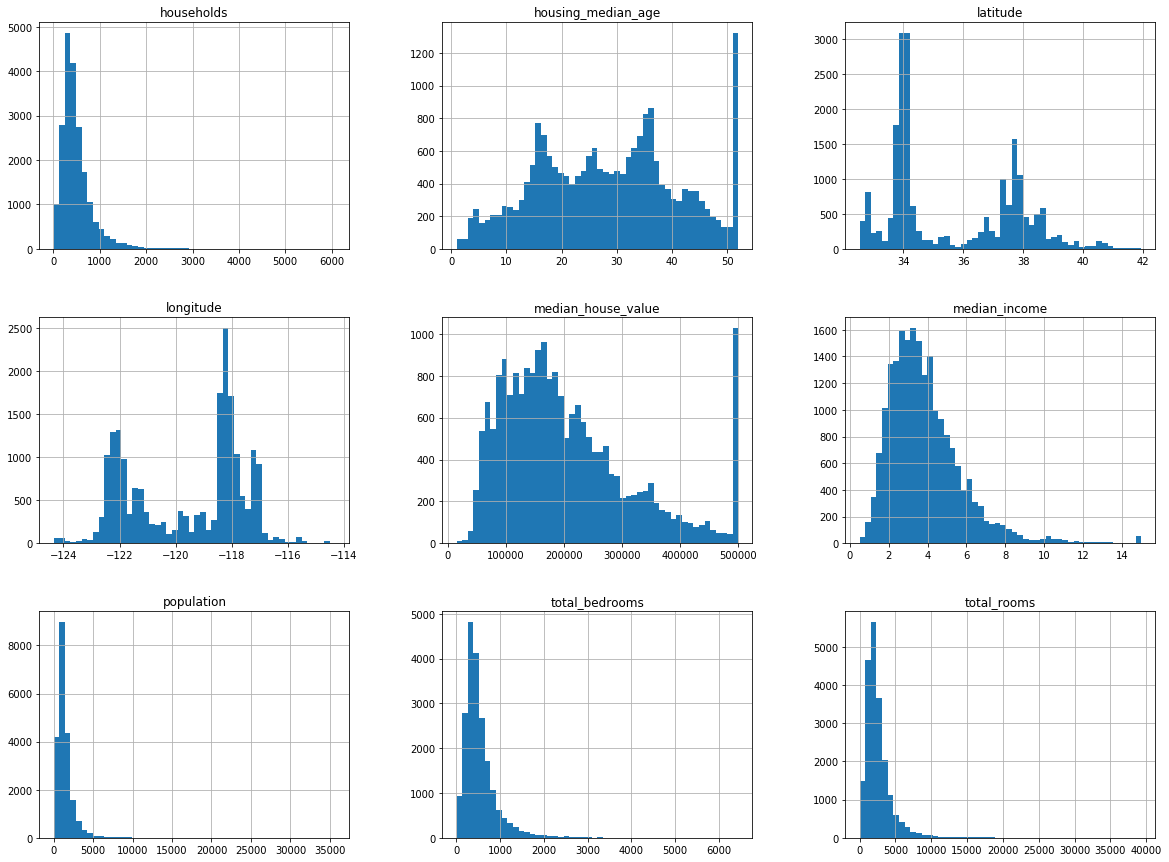

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Simplest way to randomly split dataset is train_test_split() function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print("Length of train_set =", train_set.shape[0], " and test_set =", test_set.shape[0])

Length of train_set = 16512  and test_set = 4128


Income Categories: 
 1.0     822
2.0    6581
3.0    7236
4.0    3639
5.0    2362
Name: income_cat, dtype: int64


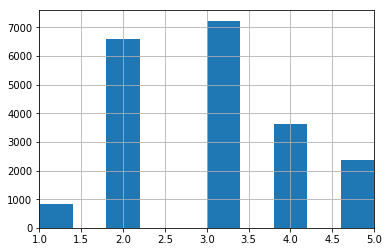

In [8]:
import numpy as np

# Create income categories for Stratified Sampling
# Create an income_cat attribute by dividing the median income by 1.5 
# (to limit the number of income categories), and rounding up using ceil 
# (to have discrete categories), and then merging all the categories
# greater than 5 into category 5
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print("Income Categories: \n", housing.income_cat.value_counts().sort_index())
ax = housing["income_cat"].hist()
ax.set_xlim(1,5)
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# Doing stratified sampling based in income_cat
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
stratSplit.split(housing, housing["income_cat"])

for train_index, test_index in stratSplit.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    
print("Length of strat_train_set =", strat_train_set.shape[0], " and strat_test_set =", strat_test_set.shape[0])

Length of strat_train_set = 16512  and strat_test_set = 4128


In [10]:
# Remove the income_cat attribute from stratified
# sample data so the data is back to its original state
# NOTE that housing df is not affected
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Softwares_Installed\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Discover and Visualize the Data to Gain Insights

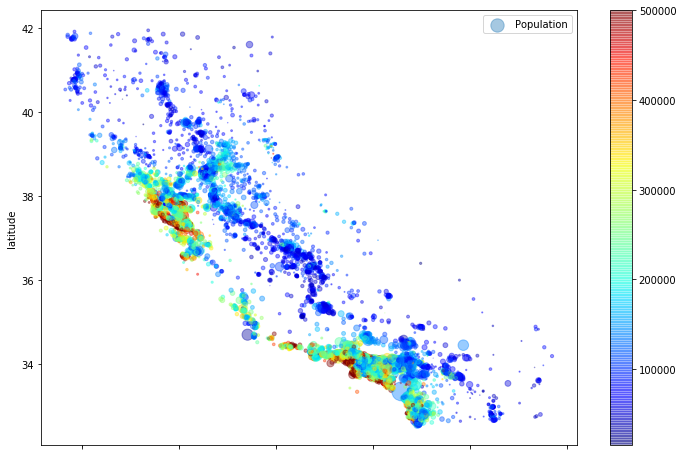

In [11]:
# Create a copy of test set
housing = strat_train_set.copy()

# Plot a scatter plot
housing.plot(figsize=(12,8), kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing["population"]/100, label="Population", marker="o",
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True
            )
plt.legend()
plt.show()

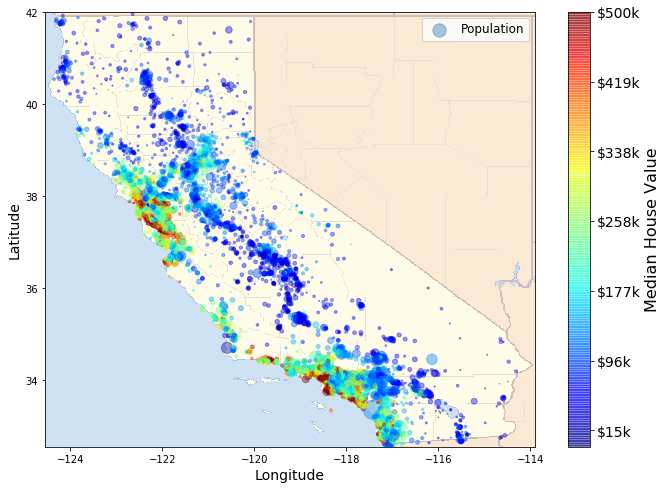

In [12]:
import matplotlib.image as mpimg

# Scatter plot with map
california_img=mpimg.imread(os.path.join("datasets", "california.png"))
ax = housing.plot(figsize=(12,8), kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing["population"]/100, label="Population", marker="o",
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=False
            )
plt.imshow(california_img, extent=[-124.55, -113.9, 32.55, 42], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 7)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=12)

plt.show()

In [13]:
# Compute Pearson's correlation between features
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

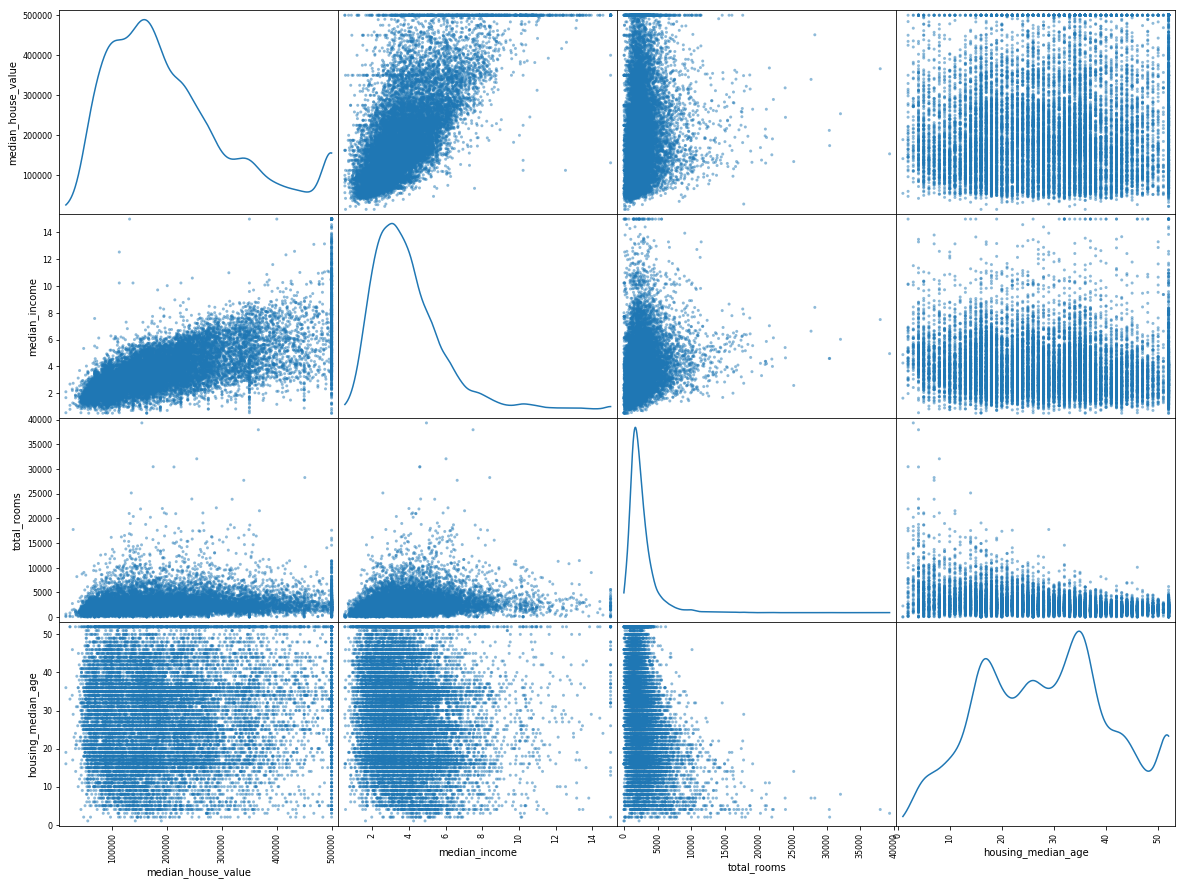

In [14]:
# Pandas scatter matrix plot
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], diagonal='kde', figsize=(20,15))
plt.show()

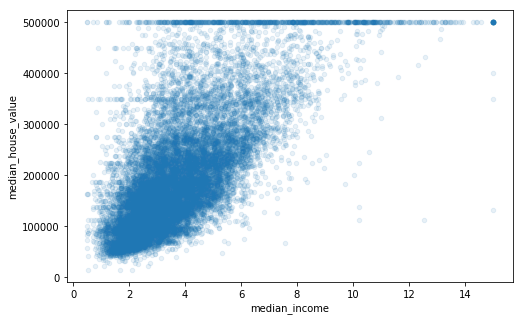

In [15]:
# Correlation graph of median_income and median_house_value
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1, figsize=(8,5))
plt.show()

In [16]:
# In above graph we see few horizontal lines
# What are those median_house_values?
result = housing['median_house_value'].value_counts().sort_values(ascending=False).head(10)
print(result)

500001.0    786
137500.0    102
162500.0     91
112500.0     80
187500.0     76
225000.0     70
350000.0     65
87500.0      59
150000.0     58
175000.0     52
Name: median_house_value, dtype: int64


In [17]:
# Adding new attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

In [18]:
# Separate out independent and target features
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [19]:
# Data cleaning
# Fill missing values using Imputer class
from sklearn.impute import SimpleImputer

# Remove non-numerical attribute before using Imputer
housing_num = housing.drop("ocean_proximity", axis=1)

# Use Imputer
print("Empty total_bedrooms BEFORE Imputer =", housing_num.total_bedrooms.isna().sum())
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
print("Medians computed by Imputer =", imputer.statistics_)
print("Medians computer by median() function =", housing_num.median().values)

# Transform data, i.e. fill in missing values
housing_filled = imputer.transform(housing_num)
housing_num = pd.DataFrame(housing_filled, columns=housing_num.columns)
print("Empty total_bedrooms AFTER Imputer =", housing_num.total_bedrooms.isna().sum())

Empty total_bedrooms BEFORE Imputer = 158
Medians computed by Imputer = [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
Medians computer by median() function = [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
Empty total_bedrooms AFTER Imputer = 0


In [20]:
# Handling Text and Categorical Attributes
from sklearn.preprocessing import LabelEncoder

# Label Encoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print("encoder.classes_ = ", encoder.classes_)
print(list(zip(housing_cat, housing_cat_encoded))[:10])

encoder.classes_ =  ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
[('<1H OCEAN', 0), ('<1H OCEAN', 0), ('NEAR OCEAN', 4), ('INLAND', 1), ('<1H OCEAN', 0), ('INLAND', 1), ('<1H OCEAN', 0), ('INLAND', 1), ('<1H OCEAN', 0), ('<1H OCEAN', 0)]


In [21]:
# One Hot Encoder (no need to provide LabelEncoded value as input)
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
housing_cat_1hot = oneHotEncoder.fit_transform(housing_cat.values.reshape(-1,1))
print("housing_cat_1hot =", housing_cat_1hot.toarray()[:10])
housing_cat_1hot

housing_cat_1hot = [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [22]:
# We can apply both transformations (from text categories 
# to integer categories, then from integer categories to 
# one-hot vectors) in one shot using the LabelBinarizer class
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int32'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [23]:
# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin

# Column index of attributes to be transformed
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
        
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print("housing.shape =", housing.shape)
print("housing_extra_attribs.shape =", housing_extra_attribs.shape)

housing.shape = (16512, 9)
housing_extra_attribs.shape = (16512, 11)


In [24]:
# Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr[1], "\n\n", housing_num.iloc[1])

[-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
 -1.02222705  1.33645936  0.21768338 -0.03353391 -0.83628902] 

 longitude            -121.9300
latitude               37.0500
housing_median_age     14.0000
total_rooms           679.0000
total_bedrooms        108.0000
population            306.0000
households            113.0000
median_income           6.4214
Name: 1, dtype: float64


In [25]:
# Comprehensive Pipeline for entire dataset
# NOT USED ANYMORE - Custom transformer to extract selected columns from Pandas df
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
# Numerical attributes
num_attribs = list(housing_num)

# Categorical attributes
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])

# Create full Pipeline
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print("housing_prepared.shape =", housing_prepared.shape)
housing_prepared

housing_prepared.shape = (16512, 16)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Select and Train a Model

In [26]:
print("Training features =", housing_prepared.shape)
print("Training labels =", housing_labels.shape)

Training features = (16512, 16)
Training labels = (16512,)


In [27]:
# Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Test (predict) on a small set of data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [29]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [30]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# RMSE
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

### Evaluation Using Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score

# K-fold cross validation with 10 folds for DecisionTreeRegressor
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

# Display score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

# K-fold cross validation with 10 folds for Linear Regressor
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# Display score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [68828.36544526 65930.79664443 70332.52340831 69003.05461887
 71743.94006437 75418.14844828 71074.4237643  71122.98474371
 77543.982511   69836.30729182]
Mean: 71083.45269403487
Standard deviation: 3147.1975808861303
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


In [32]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# RMSE
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE of RandomForestRegressor =", forest_mse)

# K-fold cross validation with 10 folds for RandomForestRegressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-lin_scores)

# Display score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_rmse_scores)

RMSE of RandomForestRegressor = 382656269.16084117
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


In [33]:
# Grid Search to evaluate best value of hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg_grid = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg_grid, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [34]:
# Analyze the Best Models and Their Errors
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[6.98074304e-02 6.54631893e-02 4.35227951e-02 1.59576674e-02
 1.53330176e-02 1.49435286e-02 1.45307767e-02 3.98590757e-01
 5.13990570e-02 1.09689682e-01 4.63581847e-02 6.16157947e-03
 1.42379571e-01 1.19803390e-04 1.47666447e-03 4.26629524e-03]


[(0.39859075736838334, 'median_income'),
 (0.14237957095800216, 'INLAND'),
 (0.10968968221682367, 'pop_per_hhold'),
 (0.06980743037495934, 'longitude'),
 (0.06546318929105861, 'latitude'),
 (0.05139905699867537, 'rooms_per_hhold'),
 (0.046358184678253436, 'bedrooms_per_room'),
 (0.04352279513571209, 'housing_median_age'),
 (0.015957667435592685, 'total_rooms'),
 (0.015333017639701458, 'total_bedrooms'),
 (0.014943528638921063, 'population'),
 (0.014530776701095854, 'households'),
 (0.006161579465377681, '<1H OCEAN'),
 (0.004266295238428067, 'NEAR OCEAN'),
 (0.0014766644690717879, 'NEAR BAY'),
 (0.00011980338994340976, 'ISLAND')]

In [35]:
# Evaluate model on test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

# RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final_rmse =", final_rmse)

# RMSLE
from sklearn.metrics import mean_squared_log_error
final_msle = mean_squared_log_error(y_test, final_predictions)
final_rmsle = np.sqrt(final_msle)
print("final_rmsle =", final_rmsle)

final_rmse = 48060.468071184696
final_rmsle = 0.23809944667258123


In [36]:
# Remove few less important features and run the model
X_attrib = ['median_income', 'longitude', 'latitude', 'population', 
            'ocean_proximity', 'total_rooms', 'housing_median_age', 
           'households', 'total_bedrooms']
X_attrib_1 = ['median_income', 'population', 
            'ocean_proximity',  
           'households']
X_test = strat_test_set[X_attrib].copy()
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = forest_reg.predict(X_test_prepared)

# RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final_rmse =", final_rmse)

# RMSLE
from sklearn.metrics import mean_squared_log_error
final_msle = mean_squared_log_error(y_test, final_predictions)
final_rmsle = np.sqrt(final_msle)
print("final_rmsle =", final_rmsle)

final_rmse = 49357.43188098478
final_rmsle = 0.24225871813286298
